In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split

In [187]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [188]:
df.reset_index(drop=True,inplace=True)

In [189]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [190]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [191]:
df.drop(all_indices,axis=0,inplace=True)

In [192]:
df.reset_index(drop=True,inplace=True)

In [193]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [194]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,69,29,1,1,0,12.613856,30.859494
1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,87,87,0,0,1,14.375822,33.112379
2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,55,55,1,1,0,10.617501,10.988905
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,33,33,0,0,1,11.683886,27.230991
4,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,98003,25,25,0,0,0,33.155745,14.995397


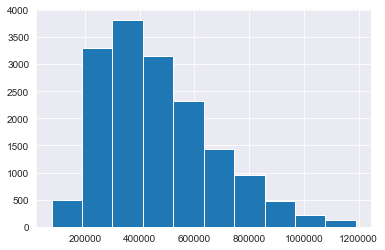

In [195]:
df['price'].hist()

In [196]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,69,29,1,1,0,12.613856,30.859494
1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,87,87,0,0,1,14.375822,33.112379
2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,55,55,1,1,0,10.617501,10.988905
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,33,33,0,0,1,11.683886,27.230991
4,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,98003,25,25,0,0,0,33.155745,14.995397


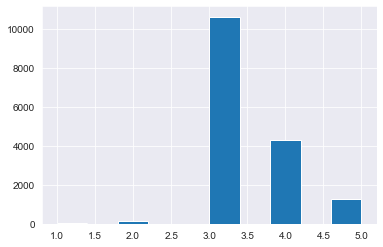

In [197]:
df['condition'].hist()

In [198]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

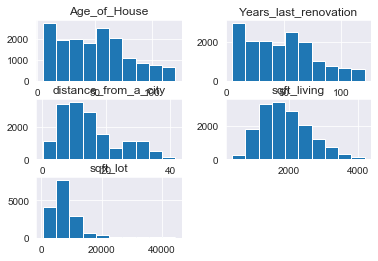

In [199]:
df[features].hist();

In [200]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [201]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])

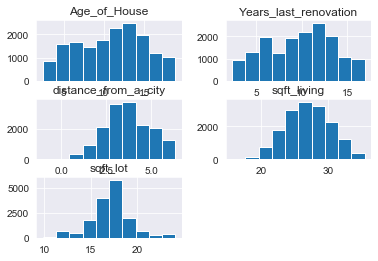

In [202]:
df[features].hist();

In [203]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [204]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']


In [205]:
for feat in norm:
    df[feat] = norm_feat(df[feat])

In [206]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [207]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [253]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Age_of_House','basement','grade']
outcome = ['price']

In [254]:
train, test = train_test_split(df)


In [255]:
print(len(train), len(test))
train.head()

11701 3901


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport,bedbath
15513,2014-12-15,256950.0,-1.572267,-0.017109,-1.298258,-3.014950,2.0,0.0,0.0,3,9,98106,-1.457745,-1.413326,1,0,0,-0.429351,9.578013,0.026900
15786,2014-07-28,269800.0,0.884777,1.093285,0.026933,-0.996224,2.0,0.0,0.0,3,8,98198,-1.751137,-1.720562,0,1,0,1.266081,8.630495,0.967314
13195,2015-03-15,445000.0,-1.572267,-1.497635,-1.565057,-0.530916,1.0,0.0,0.0,3,6,98144,0.994085,1.045741,0,0,0,-1.740027,15.874744,2.354682
14398,2014-07-29,179000.0,0.884777,-0.387241,-0.031815,0.049398,1.5,0.0,0.0,3,6,98168,1.912802,1.935848,1,0,0,-0.062738,5.989429,-0.342622
13905,2015-02-23,455000.0,-0.343745,-0.757372,-0.935325,0.212802,1.0,0.0,0.0,3,7,98008,0.335410,0.399059,0,0,1,-0.978402,24.786150,0.260343


In [256]:
X = train[x_cols]
y = train['price']

In [257]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.369e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:31   Log-Likelihood:                     -1.5096e+05
No. Observations:               11701   AIC:                                  3.019e+05
Df Residuals:                   11693   BIC:                                  3.020e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.406e+04   1197.282    -11.743      0.000   -1.64e+04   -1.17e+04
bathrooms             9514.9024   1555.280      6.118      0.000    6466.294    1.26e+04
sqft_living           8.202e+04   1614.394     50.805      0.000    7.89e+04    8.52e+04
sqft_lot              8306.7984   1133.758      7.327      0.000    6084.444    1.05e+04
distance_from_a_city -9.638e+04   1073.214    -89.809      0.000   -9.85e+04   -9.43e+04
Age_of_House          2.282e+04   1331.076     17.143      0.000    2.02e+04    2.54e+04
basement             -2.657e+04   2015.664    -13.180      0.000   -3.05e+04   -2.26e+04
grade                 6.222e+04    155.939    399.002      0.000    6.19e+04    6.25e+04
==============================================================================
Omnibus:                      154.811   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.858
Skew:                           0.164   Prob(JB):                     1.81e-48
Kurtosis:                       3.586   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.406e+04,1197.282,-11.743,0.0,-1.64e+04,-1.17e+04
bathrooms,9514.9024,1555.280,6.118,0.0,6466.294,1.26e+04
sqft_living,8.202e+04,1614.394,50.805,0.0,7.89e+04,8.52e+04
sqft_lot,8306.7984,1133.758,7.327,0.0,6084.444,1.05e+04
distance_from_a_city,-9.638e+04,1073.214,-89.809,0.0,-9.85e+04,-9.43e+04


In [259]:
X = train[x_cols]
y= train['price']

In [260]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.369e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:32   Log-Likelihood:                     -1.5096e+05
No. Observations:               11701   AIC:                                  3.019e+05
Df Residuals:                   11693   BIC:                                  3.020e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.406e+04   1197.282    -11.743      0.000   -1.64e+04   -1.17e+04
bathrooms             9514.9024   1555.280      6.118      0.000    6466.294    1.26e+04
sqft_living           8.202e+04   1614.394     50.805      0.000    7.89e+04    8.52e+04
sqft_lot              8306.7984   1133.758      7.327      0.000    6084.444    1.05e+04
distance_from_a_city -9.638e+04   1073.214    -89.809      0.000   -9.85e+04   -9.43e+04
Age_of_House          2.282e+04   1331.076     17.143      0.000    2.02e+04    2.54e+04
basement             -2.657e+04   2015.664    -13.180      0.000   -3.05e+04   -2.26e+04
grade                 6.222e+04    155.939    399.002      0.000    6.19e+04    6.25e+04
==============================================================================
Omnibus:                      154.811   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.858
Skew:                           0.164   Prob(JB):                     1.81e-48
Kurtosis:                       3.586   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.762196916317755),
 ('bathrooms', 2.8870982423704517),
 ('sqft_living', 3.0500280447379997),
 ('sqft_lot', 1.5965285652875387),
 ('distance_from_a_city', 1.4110395224308567),
 ('Age_of_House', 2.15549949553907),
 ('basement', 1.8183290316051397),
 ('grade', 1.6791500506957482)]

In [262]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

8 8


In [263]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.369e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:32   Log-Likelihood:                     -1.5096e+05
No. Observations:               11701   AIC:                                  3.019e+05
Df Residuals:                   11693   BIC:                                  3.020e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.406e+04   1197.282    -11.743      0.000   -1.64e+04   -1.17e+04
bathrooms             9514.9024   1555.280      6.118      0.000    6466.294    1.26e+04
sqft_living           8.202e+04   1614.394     50.805      0.000    7.89e+04    8.52e+04
sqft_lot              8306.7984   1133.758      7.327      0.000    6084.444    1.05e+04
distance_from_a_city -9.638e+04   1073.214    -89.809      0.000   -9.85e+04   -9.43e+04
Age_of_House          2.282e+04   1331.076     17.143      0.000    2.02e+04    2.54e+04
basement             -2.657e+04   2015.664    -13.180      0.000   -3.05e+04   -2.26e+04
grade                 6.222e+04    155.939    399.002      0.000    6.19e+04    6.25e+04
==============================================================================
Omnibus:                      154.811   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.858
Skew:                           0.164   Prob(JB):                     1.81e-48
Kurtosis:                       3.586   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.369e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:32   Log-Likelihood:                     -1.5096e+05
No. Observations:               11701   AIC:                                  3.019e+05
Df Residuals:                   11693   BIC:                                  3.020e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.406e+04   1197.282    -11.743      0.000   -1.64e+04   -1.17e+04
bathrooms             9514.9024   1555.280      6.118      0.000    6466.294    1.26e+04
sqft_living           8.202e+04   1614.394     50.805      0.000    7.89e+04    8.52e+04
sqft_lot              8306.7984   1133.758      7.327      0.000    6084.444    1.05e+04
distance_from_a_city -9.638e+04   1073.214    -89.809      0.000   -9.85e+04   -9.43e+04
Age_of_House          2.282e+04   1331.076     17.143      0.000    2.02e+04    2.54e+04
basement             -2.657e+04   2015.664    -13.180      0.000   -3.05e+04   -2.26e+04
grade                 6.222e+04    155.939    399.002      0.000    6.19e+04    6.25e+04
==============================================================================
Omnibus:                      154.811   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.858
Skew:                           0.164   Prob(JB):                     1.81e-48
Kurtosis:                       3.586   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

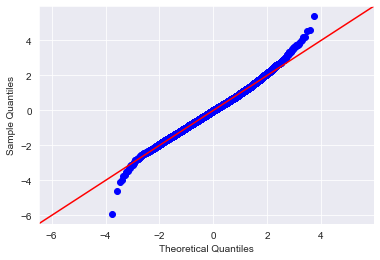

In [265]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


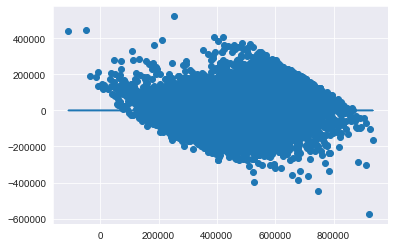

In [266]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

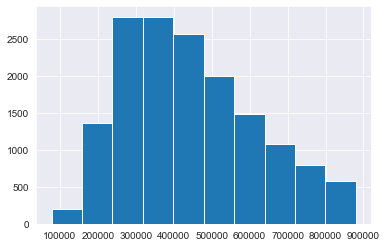

In [267]:
df.price.hist()

In [268]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 600000.0
0.81 percentile: 606000.0
0.82 percentile: 616000.0
0.83 percentile: 625000.0
0.84 percentile: 635000.0
0.85 percentile: 645000.0
0.86 percentile: 655000.0
0.87 percentile: 665987.0000000001
0.88 percentile: 677451.9999999997
0.89 percentile: 690000.0
0.9 percentile: 700000.0
0.91 percentile: 715000.0
0.92 percentile: 729999.9199999999
0.93 percentile: 745000.0
0.94 percentile: 759892.9999999988
0.95 percentile: 775000.0
0.96 percentile: 792479.9999999995
0.97 percentile: 810000.0
0.98 percentile: 830004.8999999999
0.99 percentile: 852877.2


In [269]:
orig_tot = len(df)
df = df[df.price < 970000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
train, test = train_test_split(df)

Percent removed: 0.0


In [270]:
X = train[x_cols]
y = train['price']

In [271]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.343e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:34   Log-Likelihood:                     -1.5096e+05
No. Observations:               11701   AIC:                                  3.019e+05
Df Residuals:                   11693   BIC:                                  3.020e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.23e+04   1196.834    -10.280      0.000   -1.46e+04   -9957.430
bathrooms             1.051e+04   1551.173      6.778      0.000    7472.597    1.36e+04
sqft_living           7.941e+04   1608.747     49.362      0.000    7.63e+04    8.26e+04
sqft_lot              8213.4420   1136.778      7.225      0.000    5985.167    1.04e+04
distance_from_a_city -9.537e+04   1075.441    -88.676      0.000   -9.75e+04   -9.33e+04
Age_of_House          2.346e+04   1329.920     17.641      0.000    2.09e+04    2.61e+04
basement             -2.573e+04   2011.235    -12.792      0.000   -2.97e+04   -2.18e+04
grade                 6.201e+04    155.508    398.771      0.000    6.17e+04    6.23e+04
==============================================================================
Omnibus:                      140.233   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.341
Skew:                           0.144   Prob(JB):                     1.15e-44
Kurtosis:                       3.577   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.23e+04,1196.834,-10.280,0.0,-1.46e+04,-9957.430
bathrooms,1.051e+04,1551.173,6.778,0.0,7472.597,1.36e+04
sqft_living,7.941e+04,1608.747,49.362,0.0,7.63e+04,8.26e+04
sqft_lot,8213.4420,1136.778,7.225,0.0,5985.167,1.04e+04
distance_from_a_city,-9.537e+04,1075.441,-88.676,0.0,-9.75e+04,-9.33e+04


In [273]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.343e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:34   Log-Likelihood:                     -1.5096e+05
No. Observations:               11701   AIC:                                  3.019e+05
Df Residuals:                   11693   BIC:                                  3.020e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.23e+04   1196.834    -10.280      0.000   -1.46e+04   -9957.430
bathrooms             1.051e+04   1551.173      6.778      0.000    7472.597    1.36e+04
sqft_living           7.941e+04   1608.747     49.362      0.000    7.63e+04    8.26e+04
sqft_lot              8213.4420   1136.778      7.225      0.000    5985.167    1.04e+04
distance_from_a_city -9.537e+04   1075.441    -88.676      0.000   -9.75e+04   -9.33e+04
Age_of_House          2.346e+04   1329.920     17.641      0.000    2.09e+04    2.61e+04
basement             -2.573e+04   2011.235    -12.792      0.000   -2.97e+04   -2.18e+04
grade                 6.201e+04    155.508    398.771      0.000    6.17e+04    6.23e+04
==============================================================================
Omnibus:                      140.233   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.341
Skew:                           0.144   Prob(JB):                     1.15e-44
Kurtosis:                       3.577   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.762196916317755),
 ('bathrooms', 2.8870982423704517),
 ('sqft_living', 3.0500280447379997),
 ('sqft_lot', 1.5965285652875387),
 ('distance_from_a_city', 1.4110395224308567),
 ('Age_of_House', 2.15549949553907),
 ('basement', 1.8183290316051397),
 ('grade', 1.6791500506957482)]

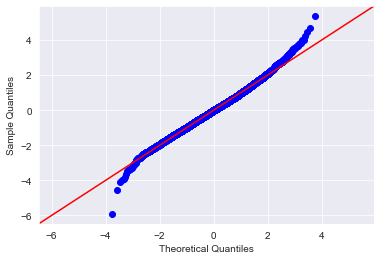

In [275]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


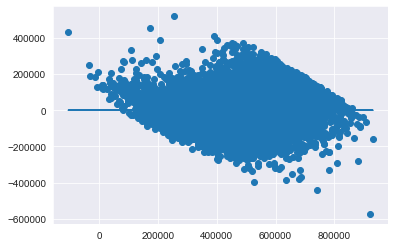

In [276]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 600000.0
0.81 percentile: 606000.0
0.82 percentile: 616000.0
0.83 percentile: 625000.0
0.84 percentile: 635000.0
0.85 percentile: 645000.0
0.86 percentile: 655000.0
0.87 percentile: 665987.0000000001
0.88 percentile: 677451.9999999997
0.89 percentile: 690000.0
0.9 percentile: 700000.0
0.91 percentile: 715000.0
0.92 percentile: 729999.9199999999
0.93 percentile: 745000.0
0.94 percentile: 759892.9999999988
0.95 percentile: 775000.0
0.96 percentile: 792479.9999999995
0.97 percentile: 810000.0
0.98 percentile: 830004.8999999999
0.99 percentile: 852877.2


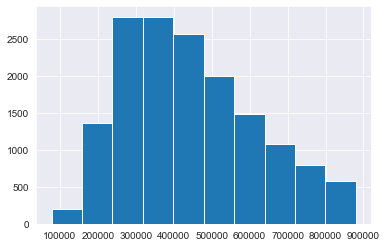

In [277]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [278]:
df = df[df.price <= 880000]
train, test = train_test_split(df)

In [279]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.331e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:42:36   Log-Likelihood:                     -1.5102e+05
No. Observations:               11701   AIC:                                  3.020e+05
Df Residuals:                   11693   BIC:                                  3.021e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.175e+04   1201.669     -9.780      0.000   -1.41e+04   -9397.256
bathrooms             1.008e+04   1557.944      6.470      0.000    7025.557    1.31e+04
sqft_living           7.912e+04   1620.547     48.825      0.000    7.59e+04    8.23e+04
sqft_lot              9201.8597   1139.208      8.077      0.000    6968.822    1.14e+04
distance_from_a_city -9.577e+04   1079.895    -88.682      0.000   -9.79e+04   -9.37e+04
Age_of_House          2.269e+04   1335.661     16.986      0.000    2.01e+04    2.53e+04
basement             -2.622e+04   2034.834    -12.884      0.000   -3.02e+04   -2.22e+04
grade                  6.21e+04    156.287    397.356      0.000    6.18e+04    6.24e+04
==============================================================================
Omnibus:                      165.040   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.182
Skew:                           0.166   Prob(JB):                     7.00e-53
Kurtosis:                       3.619   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

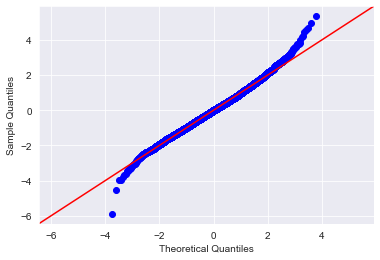

In [280]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


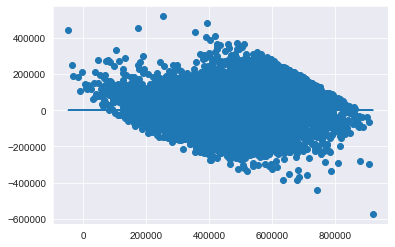

In [281]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [282]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [283]:
residuals = model.resid

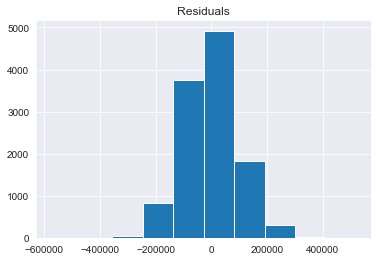

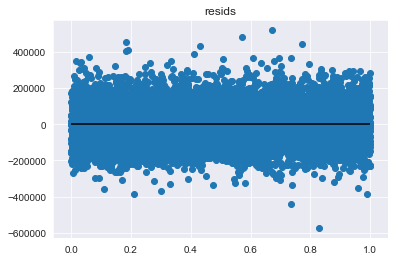

In [284]:
plot_residuals(residuals)

In [285]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [286]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [287]:
X_train = train[x_cols]
X_test = test[x_cols]

In [288]:
y_train = train['price']
y_test = test['price']

In [289]:
ols.fit(train[x_cols], train['price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [249]:
y_train_preds = ols.predict(train[x_cols])
y_train_preds

array([469576.76474966, 462350.82685665, 334163.81688197, ...,
       568813.7480789 , 493676.48376411, 502680.81029185])

In [250]:
r2_score(train['price'], y_train_preds)

0.6792214257977129

In [251]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.6792214257977129

In [252]:
testing_score = ols.score(X_test, y_test)
testing_score

0.6907781241355471

In [136]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv10_scores

(0.6977375691305203, 0.6976214131681465, 0.6976214131681465)